# Spotify Machine Learning

In [1]:
# Libraries

%matplotlib inline

import json

import pandas as pd
from pandas.io.json import json_normalize

import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [2]:
# Import JSON files

with open("top_tracks_attributes.json") as f:
    top_tracks_json = json.load(f)
    
with open("pop_tracks_attributes.json") as f:
    genre_tracks_json = json.load(f)
    
# with open
    
top_tracks = json_normalize(top_tracks_json)
top_tracks['rank'] = range(1, len(top_tracks) + 1)

genre_tracks = json_normalize(genre_tracks_json)

## Characteristics to Analyze

1. acousticness
2. danceability
3. energy
4. instrumentalness
5. liveness
6. loudness
7. speechiness
8. valence

Predicting: rank

Assume all attributes of are equal weight initially.

In [3]:
train = top_tracks.sample(frac=.8)
test = top_tracks.drop(train.index)

In [4]:
train

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,rank
29,0.008760,https://api.spotify.com/v1/audio-analysis/0wJo...,0.533,170813,0.905,0wJoRiX5K5BxlqZTolB2LD,0.578000,2,0.0698,-5.270,1,0.0754,108.900,4,https://api.spotify.com/v1/tracks/0wJoRiX5K5Bx...,audio_features,spotify:track:0wJoRiX5K5BxlqZTolB2LD,0.4860,30
48,0.031100,https://api.spotify.com/v1/audio-analysis/2jt2...,0.939,337941,0.551,2jt2WxXMCD4zjACthkJQVE,0.000000,1,0.1920,-9.126,1,0.2910,118.552,4,https://api.spotify.com/v1/tracks/2jt2WxXMCD4z...,audio_features,spotify:track:2jt2WxXMCD4zjACthkJQVE,0.4200,49
46,0.431000,https://api.spotify.com/v1/audio-analysis/5vV3...,0.571,284853,0.551,5vV3MXW9acnFuYeYO08CHC,0.020700,7,0.0852,-8.736,0,0.0268,134.819,4,https://api.spotify.com/v1/tracks/5vV3MXW9acnF...,audio_features,spotify:track:5vV3MXW9acnFuYeYO08CHC,0.1650,47
10,0.074800,https://api.spotify.com/v1/audio-analysis/72Z1...,0.299,318813,0.443,72Z17vmmeQKAg8bptWvpVG,0.000138,0,0.1770,-12.621,1,0.0346,139.539,4,https://api.spotify.com/v1/tracks/72Z17vmmeQKA...,audio_features,spotify:track:72Z17vmmeQKAg8bptWvpVG,0.4340,11
15,0.002900,https://api.spotify.com/v1/audio-analysis/5QTx...,0.333,308120,0.927,5QTxFnGygVM4jFQiBovmRo,0.000211,9,0.2970,-8.550,0,0.0733,141.470,4,https://api.spotify.com/v1/tracks/5QTxFnGygVM4...,audio_features,spotify:track:5QTxFnGygVM4jFQiBovmRo,0.3820,16
6,0.012500,https://api.spotify.com/v1/audio-analysis/7f0v...,0.522,245960,0.923,7f0vVL3xi4i78Rv5Ptn2s1,0.017000,2,0.0854,-4.560,1,0.0539,170.057,4,https://api.spotify.com/v1/tracks/7f0vVL3xi4i7...,audio_features,spotify:track:7f0vVL3xi4i78Rv5Ptn2s1,0.5950,7
22,0.048300,https://api.spotify.com/v1/audio-analysis/086m...,0.691,161124,0.631,086myS9r57YsLbJpU0TgK9,0.000011,2,0.1040,-6.478,1,0.0368,92.004,4,https://api.spotify.com/v1/tracks/086myS9r57Ys...,audio_features,spotify:track:086myS9r57YsLbJpU0TgK9,0.8000,23
18,0.863000,https://api.spotify.com/v1/audio-analysis/1TKT...,0.356,469224,0.302,1TKTiKp3zbNgrBH2IwSwIx,0.546000,2,0.6340,-14.528,1,0.0346,72.623,4,https://api.spotify.com/v1/tracks/1TKTiKp3zbNg...,audio_features,spotify:track:1TKTiKp3zbNgrBH2IwSwIx,0.1260,19
9,0.004740,https://api.spotify.com/v1/audio-analysis/5EYd...,0.841,260507,0.741,5EYdTPdJD74r9EVZBztqGG,0.012100,0,0.0911,-6.222,0,0.0392,122.984,4,https://api.spotify.com/v1/tracks/5EYdTPdJD74r...,audio_features,spotify:track:5EYdTPdJD74r9EVZBztqGG,0.9700,10
49,0.013900,https://api.spotify.com/v1/audio-analysis/7yka...,0.441,212360,0.747,7ykaGsyod4JPbWiaNNlP5B,0.022400,8,0.1110,-9.034,1,0.0585,84.960,4,https://api.spotify.com/v1/tracks/7ykaGsyod4JP...,audio_features,spotify:track:7ykaGsyod4JPbWiaNNlP5B,0.0517,50


In [5]:
X_train = train[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']]
y_train = train['rank']
X_test = test[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']]
y_test = test['rank']

In [6]:
# this it the API's way of standardizing the data into scalar form
scaler = StandardScaler()

# This determines which data set to standardize with respect to.
scaler.fit(X_train)

# Now we need to standardize both the training and test sets with
# respect to the training data.
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

## Find Optimal K-Value

In [7]:
def get_Kneighbors_test_error(k):
    scaler = StandardScaler()
    model = KNeighborsRegressor(n_neighbors=k)
    pipeline = Pipeline([('transform', scaler), ('fit', model)])
    return np.sqrt(np.abs(cross_val_score(pipeline, X_train, y_train, cv=10, scoring="neg_mean_squared_error").mean()))

In [8]:
ks = pd.Series(range(1, 30, 1))
ks.index = ks

k_cross_val = ks.apply(get_Kneighbors_test_error)

4

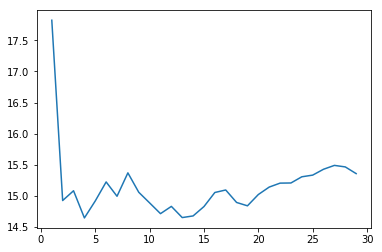

In [9]:
k_cross_val.plot()
k_cross_val.idxmin()

## K-nearest Neighbors Analysis

In [10]:
scaler = StandardScaler()
model = KNeighborsRegressor(n_neighbors=15)
pipeline = Pipeline([('transform', scaler), ('fit', model)])
np.sqrt(np.abs(cross_val_score(pipeline, X_train, y_train, cv=10, scoring="neg_mean_squared_error").mean()))

14.82382091994728

In [11]:
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
y_test_pred

array([25.26666667, 27.8       , 18.93333333, 18.93333333, 22.33333333,
       27.8       , 27.8       , 24.46666667, 23.73333333, 25.53333333])

In [17]:
genre_test = genre_tracks[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']]

In [21]:
model.predict(genre_test)

array([22.33333333, 23.73333333, 25.53333333, 23.73333333, 27.73333333,
       27.8       , 22.93333333, 23.73333333, 24.46666667, 23.73333333,
       25.53333333, 22.33333333, 25.26666667, 25.8       , 23.73333333,
       27.8       , 25.53333333, 27.8       , 25.13333333, 26.6       ,
       24.73333333, 25.53333333, 25.13333333, 25.26666667, 27.8       ,
       23.73333333, 20.8       , 23.73333333, 25.53333333, 23.73333333,
       27.8       , 25.8       , 23.73333333, 23.73333333, 25.53333333,
       24.46666667, 23.73333333, 20.8       , 23.73333333, 22.66666667,
       25.53333333, 24.46666667, 23.73333333, 21.66666667, 27.8       ,
       24.46666667, 24.46666667, 23.73333333, 27.8       , 27.8       ,
       27.8       , 23.73333333, 25.53333333, 27.73333333, 23.73333333,
       27.8       , 27.8       , 24.46666667, 23.73333333, 27.73333333,
       23.73333333, 24.46666667, 22.2       , 24.46666667, 27.8       ,
       23.73333333, 22.33333333, 24.        , 25.26666667, 24.46